### Section A: Load data & EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_csv_data = pd.read_csv('data.csv', encoding='unicode_escape')

In [3]:
raw_csv_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
raw_csv_data.describe()

,Quantity,UnitPrice,CustomerID
count,12461.000000,12461.000000,8956.000000
mean,7.477249,3.973280,15598.129299
std,93.885564,17.253932,1748.194062
min,-9360.000000,0.000000,12395.000000
25%,1.000000,1.250000,14307.000000
50%,2.000000,2.510000,15646.000000
75%,6.000000,4.210000,17211.000000
max,2880.000000,940.870000,18239.000000


In [5]:
raw_csv_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
12457,537381,22632,HAND WARMER RED RETROSPOT,24.0,12/6/2010 13:13,2.10,14667.0,United Kingdom
12458,537381,22633,HAND WARMER UNION JACK,20.0,12/6/2010 13:13,2.10,14667.0,United Kingdom
12459,537381,22867,HAND WARMER BIRD DESIGN,24.0,12/6/2010 13:13,2.10,14667.0,United Kingdom
12460,537381,22601,CHRISTMAS RETROSPOT ANGEL WOOD,17.0,12/6/2010 13:13,0.85,14667.0,United Kingdom
12461,537381,22603,CHRISTMAS RETRO,NaN,NaN,NaN,NaN,NaN


In [6]:
raw_csv_data.isnull().sum()

InvoiceNo         0
StockCode         0
Description      45
Quantity          1
InvoiceDate       1
UnitPrice         1
CustomerID     3506
Country           1
dtype: int64

In [7]:
len(raw_csv_data) - raw_csv_data.isnull().sum().sum()

8907

## Section B. Data PreprocessPreprocessing 

In [8]:
raw_csv_data = raw_csv_data.dropna()

In [9]:
# Dropping missing values
raw_csv_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
len(raw_csv_data)

8956

In [11]:
raw_csv_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# RFM - is commonly used in marketing to evaluate a client’s value based on their:
# 1.Recency: How recently have they made a purchase?
# 2.Frequency: How often have they bought something?
# 3.Monetary Value: How much money do they spend on average when making purchases?


In [12]:
# convert date column to datetime format
raw_csv_data['Date']= pd.to_datetime(raw_csv_data['InvoiceDate'])

In [13]:
raw_csv_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,12/1/2010 8:26,7.65,17850.0,United Kingdom,2010-12-01 08:26:00
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,12/1/2010 8:26,4.25,17850.0,United Kingdom,2010-12-01 08:26:00
7,536366,22633,HAND WARMER UNION JACK,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom,2010-12-01 08:28:00
8,536366,22632,HAND WARMER RED POLKA DOT,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom,2010-12-01 08:28:00
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32.0,12/1/2010 8:34,1.69,13047.0,United Kingdom,2010-12-01 08:34:00


In [14]:
# rearrange from most recent date of purchase
raw_csv_data['rank'] = raw_csv_data.sort_values(['CustomerID','Date']).groupby(['CustomerID'])['Date'].rank(method='min').astype(int)
raw_csv_data = raw_csv_data[raw_csv_data['rank']==1]

In [15]:
raw_csv_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,rank
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,1
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1


In [16]:
raw_csv_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,rank
12456,537381,22865,HAND WARMER OWL DESIGN,10.0,12/6/2010 13:13,2.10,14667.0,United Kingdom,2010-12-06 13:13:00,1
12457,537381,22632,HAND WARMER RED RETROSPOT,24.0,12/6/2010 13:13,2.10,14667.0,United Kingdom,2010-12-06 13:13:00,1
12458,537381,22633,HAND WARMER UNION JACK,20.0,12/6/2010 13:13,2.10,14667.0,United Kingdom,2010-12-06 13:13:00,1
12459,537381,22867,HAND WARMER BIRD DESIGN,24.0,12/6/2010 13:13,2.10,14667.0,United Kingdom,2010-12-06 13:13:00,1
12460,537381,22601,CHRISTMAS RETROSPOT ANGEL WOOD,17.0,12/6/2010 13:13,0.85,14667.0,United Kingdom,2010-12-06 13:13:00,1


In [17]:
# assigning recency score to each customerID based on what time they last bought something
raw_csv_data['recency'] = (raw_csv_data['Date'] - pd.to_datetime(min(raw_csv_data['Date']))).dt.days

In [18]:
raw_csv_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,rank,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1,0


In [19]:
# Frequency 
# calculating frequency, how many times has each customer made a purchase on the platform:
freq = raw_csv_data.groupby('CustomerID')['Date'].count()
df_freq = pd.DataFrame(freq).reset_index()
df_freq.columns = ['CustomerID','frequency']

In [20]:
df_freq.head()

,CustomerID,frequency
0,12395.0,12
1,12427.0,10
2,12431.0,14
3,12433.0,73
4,12471.0,1


In [21]:
# merging the two dataframes 
raw_csv_data_freq = df_freq.merge(raw_csv_data,on='CustomerID')

In [22]:
raw_csv_data_freq.head()

,CustomerID,frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date,rank,recency
0,12395.0,12,537026,84375,SET OF 20 KIDS COOKIE CUTTERS,12.0,12/3/2010 16:35,2.10,Belgium,2010-12-03 16:35:00,1,2
1,12395.0,12,537026,21217,RED RETROSPOT ROUND CAKE TINS,2.0,12/3/2010 16:35,9.95,Belgium,2010-12-03 16:35:00,1,2
2,12395.0,12,537026,21212,PACK OF 72 RETROSPOT CAKE CASES,120.0,12/3/2010 16:35,0.42,Belgium,2010-12-03 16:35:00,1,2
3,12395.0,12,537026,21977,PACK OF 60 PINK PAISLEY CAKE CASES,120.0,12/3/2010 16:35,0.42,Belgium,2010-12-03 16:35:00,1,2
4,12395.0,12,537026,22417,PACK OF 60 SPACEBOY CAKE CASES,120.0,12/3/2010 16:35,0.42,Belgium,2010-12-03 16:35:00,1,2


In [23]:
# Monetary Value
# calculating each user’s monetary value to understand the total amount they have spent on the platform.
raw_csv_data_freq['total'] = raw_csv_data_freq['Quantity']*raw_csv_data['UnitPrice']
mv = raw_csv_data_freq.groupby('CustomerID')['total'].sum()
mv = pd.DataFrame(mv).reset_index()
mv.columns = ['CustomerID','monetary_value']

In [24]:
mv.head()

,CustomerID,monetary_value
0,12395.0,1823.68
1,12427.0,461.95
2,12431.0,311.15
3,12433.0,2714.92
4,12471.0,-4.20


In [25]:
# merging the two dataframes 
raw_csv_data_rfm = mv.merge(raw_csv_data_freq,on='CustomerID')

In [26]:
raw_csv_data_rfm.head()

,CustomerID,monetary_value,frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date,rank,recency,total
0,12395.0,1823.68,12,537026,84375,SET OF 20 KIDS COOKIE CUTTERS,12.0,12/3/2010 16:35,2.10,Belgium,2010-12-03 16:35:00,1,2,30.60
1,12395.0,1823.68,12,537026,21217,RED RETROSPOT ROUND CAKE TINS,2.0,12/3/2010 16:35,9.95,Belgium,2010-12-03 16:35:00,1,2,6.78
2,12395.0,1823.68,12,537026,21212,PACK OF 72 RETROSPOT CAKE CASES,120.0,12/3/2010 16:35,0.42,Belgium,2010-12-03 16:35:00,1,2,330.00
3,12395.0,1823.68,12,537026,21977,PACK OF 60 PINK PAISLEY CAKE CASES,120.0,12/3/2010 16:35,0.42,Belgium,2010-12-03 16:35:00,1,2,406.80
4,12395.0,1823.68,12,537026,22417,PACK OF 60 SPACEBOY CAKE CASES,120.0,12/3/2010 16:35,0.42,Belgium,2010-12-03 16:35:00,1,2,406.80


In [ ]:
## Final Dataset

In [27]:
# choosing the required columns 
df = raw_csv_data_rfm[['CustomerID','recency','frequency','monetary_value']]

In [28]:
df.head()

,CustomerID,recency,frequency,monetary_value
0,12395.0,2,12,1823.68
1,12395.0,2,12,1823.68
2,12395.0,2,12,1823.68
3,12395.0,2,12,1823.68
4,12395.0,2,12,1823.68


recency: 


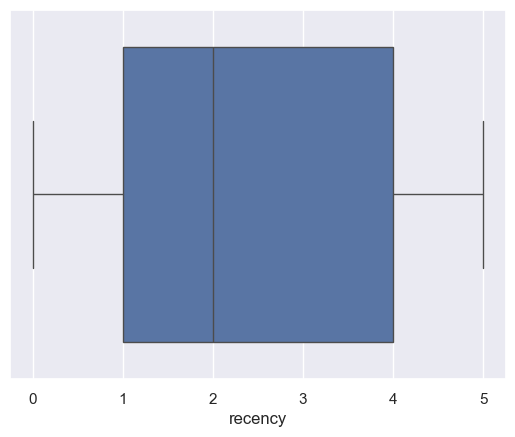

frequency: 


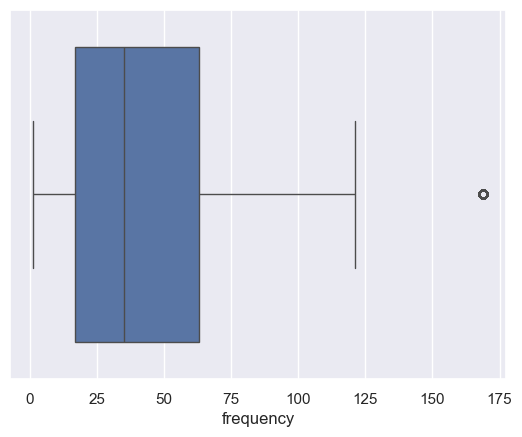

monetary_value: 


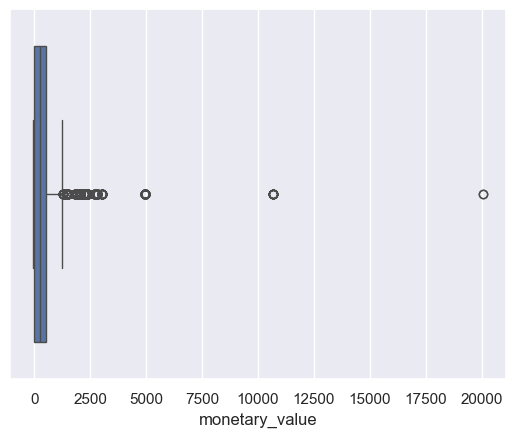

In [29]:
# Checking for outlieoutliers
df_list = ['recency','frequency','monetary_value']
for i in df_list:
    print(str(i)+': ')
    ax = sns.boxplot(x=df[str(i)])
    plt.show()


### 1. only Recency with no visible outliers.
### 2. Frequency and Monetary_value have many outliers.

In [30]:
# Removing outliers
# We use Z-Scores to identify the outliers
from scipy import stats

In [31]:
# remove the customer id column
new_df = df.drop(['CustomerID'], axis=1)

In [32]:
new_df.head()

,recency,frequency,monetary_value
0,2,12,1823.68
1,2,12,1823.68
2,2,12,1823.68
3,2,12,1823.68
4,2,12,1823.68


In [33]:
# remove outliers
z_scores = stats.zscore(new_df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = new_df[filtered_entries]

In [34]:
# Removing duplicates
new_df = new_df.drop_duplicates()

In [35]:
# applying Standardization
from sklearn.preprocessing import StandardScaler

In [36]:
col_names = ['recency', 'frequency', 'monetary_value']
features = new_df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

In [37]:
scaled_features.head()

,recency,frequency,monetary_value
0,0.010169,-0.434157,2.886283
1,0.010169,-0.527458,0.219666
2,-1.084655,-0.340855,-0.075639
3,-1.084655,2.411548,4.631560
4,-0.537243,-0.947316,-0.693175


In [38]:
scaled_features.tail()

,recency,frequency,monetary_value
318,-0.537243,-0.807364,-0.698071
319,1.652405,-0.387506,-0.478217
320,0.010169,-0.947316,-0.696308
321,-1.084655,-0.667411,-0.301837
322,-0.537243,0.358909,1.024294


## Building The Customer Segmentation Model

In [39]:
## we will use K-Means clustering algorithm to perform customer segmentation.

In [40]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
SSE = []

In [41]:
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

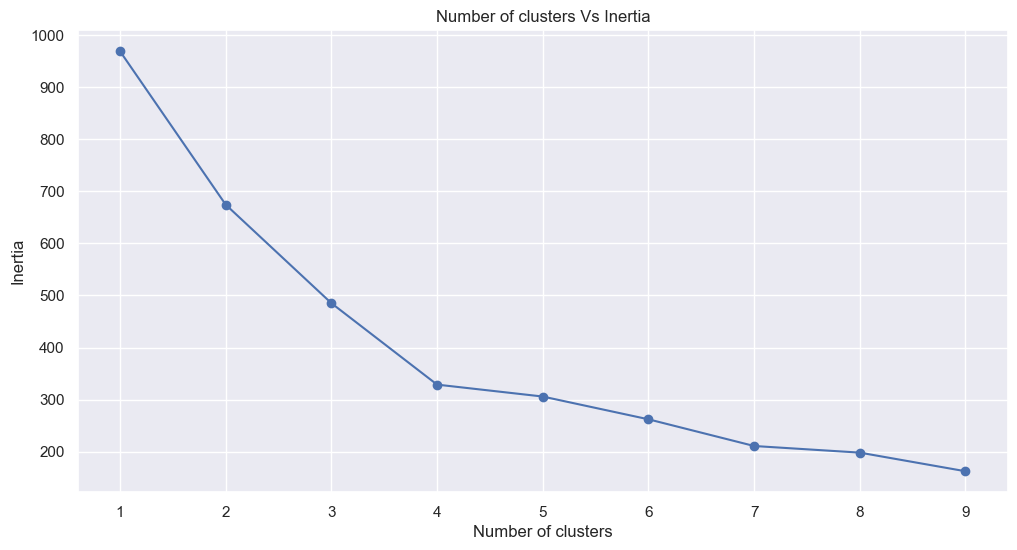

In [42]:
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.title('Number of clusters Vs Inertia') 
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
## NB:
# The point of inflection on the curve is at the 4-cluster mark. 
# The optimal number of clusters to use in this K-Means algorithm is 4. 

In [43]:
# we first build a model with 4 clusters
kmeans = KMeans( n_clusters = 4, init='k-means++')
kmeans.fit(scaled_features)

KMeans(n_clusters=4)

In [44]:
# We evaluate the performance of this model using silhouette score metrics
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))

0.4590951217504104


In [45]:
# assigning clusters to each customer
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(new_df)
frame['cluster'] = pred

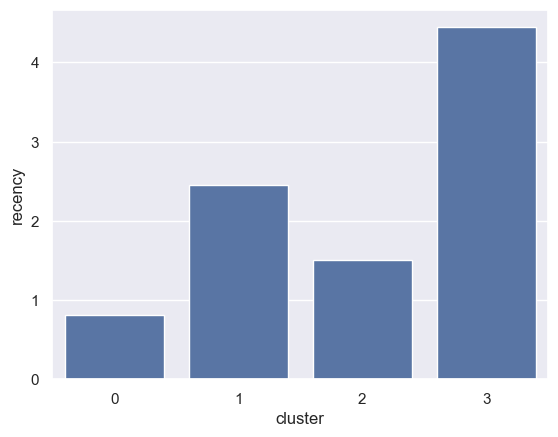

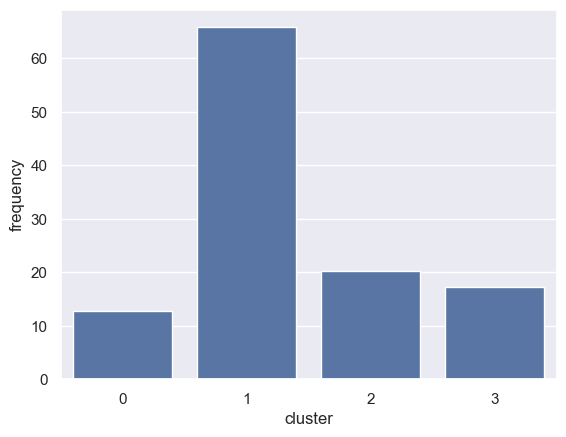

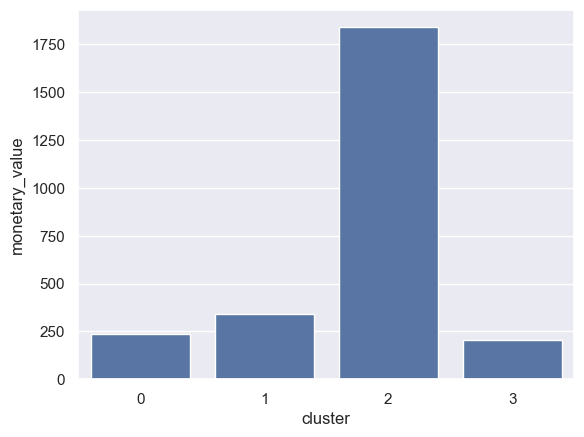

In [46]:
# Visualizing the data
df_new_avg = frame.groupby(['cluster'], as_index=False).mean()
for i in df_list:
    sns.barplot(x='cluster',y=str(i),data=df_new_avg)
    plt.show()

## Summary

### Cluster 0: Customers with low recency, frequency, and monetary value scores. These are occasional buyers likely to visit the platform only when they have a specific need.
### Cluster 1: Customers who make purchases often and have visited recently but have a low monetary value. These are frequent visitors who make small or few purchases each time.
### Cluster 2: High-frequency customers with high monetary value, indicating they spend a lot when shopping. This cluster likely includes bulk purchasers or those responsive to promotions.
### Cluster 3: New users with potential for long-term engagement. They have low monetary value and frequency but should be targeted with promotions to build brand loyalty.